# Análisis Exploratorio de Datos (EDA) sobre Vivienda en Euskadi (2012-2025)
# Memoria explicativa

## Introducción

Este proyecto tiene como objetivo realizar un análisis exploratorio de los precios de la vivienda en Euskadi, prestando especial atención a su evolución en el tiempo, a las posibles diferencias entre los distintos tipos de ocupación (alquiler o compra) o las disparidades entre los Territorios Históricos, Araba, Bizkaia y Gipuzkoa. 
Se busca también identificar posibles relaciones entre estas variaciones y factores demográficos y económicos, como la inmigración, las solicitudes de vivienda protegida o la aparición de pisos turísticos.
Todo mediante una metodología basada en la presentación de hipótesis que puedan responderse con un sí o no, como por ejemplo, ¿podemos decir que se construye más vivienda en territorios con más suelo liberado?, y su afirmación o refutación sostenida en gráficos obtenidos de los datos obtenidos para armar el proyecto.


## 2. Fuentes de datos

Los datos utilizados en este análisis provienen de las siguientes fuentes oficiales:

- **[Eustat (Instituto Vasco de Estadística)](https://www.eustat.eus/)**: Datos de precios de compraventa y alquiler de vivienda, población, vivienda protegida, saldo migratorio, pisos turísticos, etc.
- **[INE (Instituto Nacional de Estadística)](https://www.ine.es/)**: Variables de apoyo demográfico y económico a nivel nacional y regional.
- **[Open Data Euskadi](https://opendata.euskadi.eus/)**: Información adicional sobre vivienda pública, urbanismo y fianzas de alquiler depositadas.


## 3. Carga y limpieza de datos

### 3.1 Criterios de limpieza

Dado que los datasets provienen de fuentes distintas, fue necesario aplicar un proceso de limpieza y estandarización con los siguientes criterios:

- Homogeneizar los nombres de columnas.
- Unificar el formato de fechas (trimestres y años).
- Estructurar todos los datasets por **territorio histórico** (`Araba`, `Bizkaia`, `Gipuzkoa`) y **año**, según aplique.
- Eliminar filas con datos nulos irrelevantes o fuera del rango temporal (2012–2025).

---

### 3.2 Código de ejemplo

A continuación, un ejemplo simplificado de la carga y estandarización de un CSV de precios de vivienda, aunque más adelante iremos explicando uno a uno todo el código:

```python
import pandas as pd

# Cargar precios de vivienda (ejemplo: precios por m² de vivienda libre)
df_precios = pd.read_csv("precios_vivienda_euskadi.csv")

# Visualizar primeras filas
print(df_precios.head())

# Renombrar columnas para homogeneizar
df_precios.rename(columns={
    "Territorio histórico": "territorio",
    "Periodo": "periodo",
    "Tipo de vivienda": "tipo_vivienda",
    "Precio medio m2": "precio_m2"
}, inplace=True)

# Extraer año y trimestre si es necesario
df_precios["año"] = df_precios["periodo"].str.extract(r'(\d{4})').astype(int)
df_precios["trimestre"] = df_precios["periodo"].str.extract(r'T(\d)').astype(int)

# Asegurar que los territorios estén uniformizados
df_precios["territorio"] = df_precios["territorio"].str.strip().str.capitalize()

# Filtrar por años de interés
df_precios = df_precios[df_precios["año"].between(2012, 2025)]

# Verificar estructura final
print(df_precios.dtypes)
print(df_precios.sample(5))


## Proceso de limpieza de datos, script a script:

,Territorio,2024,2023,2022,2021,2020
0,Araba,4070,3320,3250,3280,3320
1,Bizkaia,2947,2545,2074,1928,2025
2,CAE,5828,5121,4693,4354,4598
3,Gipuzkoa,2474,2256,2294,2098,2241


### Precio alquiler Euskadi - Territorios históricos

Este script procesa un archivo csv con datos de precios de alquiler por trimestre en Euskadi, se puede descargar desde esta Fuente: https://www.eustat.eus/elementos/ele0017700/renta-mensual-media-de-los-contratos-de-alquiler-libre-de-vivienda-habitual-colectiva-contrato-de-vivienda-habitual-por-territorio-historico-y-tamano-del-municipio-segun-trimestre-de-inicio-del-contrato-eurosmes/tbl0017789_c.html. Lee el archivo saltando las primeras filas, filtra solo los registros de la CAE y sus tres provincias, y normaliza los nombres de los territorios. Luego elimina columnas vacías, convierte los valores numéricos al formato correcto (reemplazando comas por puntos) y calcula la media anual del precio de alquiler por territorio a partir de los valores trimestrales. Finalmente, genera un nuevo DataFrame con estos promedios anuales y lo guarda como un nuevo archivo csv.



In [ ]:
import pandas as pd

archivo = "../data/precio_alquiler.csv"

df = pd.read_csv(archivo, sep=';', skiprows=5, header=None, encoding='latin1')

territorios = ['C.A. de Euskadi', '   Araba/Álava', '   Bizkaia', '   Gipuzkoa']
df = df[df[0].isin(territorios)].reset_index(drop=True)

df[0] = df[0].str.strip().replace({
    'C.A. de Euskadi': 'CAE',
    'Araba/Álava': 'Araba',
    'Bizkaia': 'Bizkaia',
    'Gipuzkoa': 'Gipuzkoa'
})

df = df.dropna(axis=1, how='all')

data_only = df.iloc[:, 1:].applymap(lambda x: str(x).replace(',', '.')).astype(float)

años = list(range(2016, 2025))
n_trimestres = 4

columnas_anuales = {}
for i, año in enumerate(años):
    inicio = i * n_trimestres
    fin = inicio + n_trimestres
    columnas_anuales[año] = data_only.iloc[:, inicio:fin].mean(axis=1)

df_resultado = pd.DataFrame(columnas_anuales)
df_resultado.insert(0, 'Territorio', df[0])

df_resultado.to_csv('../data/precio_alquiler_.csv')

df_resultado

df = pd.read_csv("../data/precio_alquiler_.csv", sep=',', encoding="latin1")
df = df.drop(columns=df.columns[0])

df.to_csv('../data/precio_alquiler_final.csv', index=False)

df.head()

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_12624\3307703703.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_only = df.iloc[:, 1:].applymap(lambda x: str(x).replace(',', '.')).astype(float)


,Territorio,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,CAE,628.611352,638.736288,667.306500,688.964002,702.334793,709.413165,735.088313,776.313490,795.721470
1,Araba,544.793245,559.165458,592.394645,621.516687,634.338480,644.832238,678.004437,718.343090,723.885465
2,Bizkaia,644.169768,655.916545,690.234163,713.666588,729.841342,737.460952,762.392385,809.144362,828.982632
3,Gipuzkoa,642.550235,650.212623,671.556517,690.769225,700.095973,706.987067,731.464312,770.008853,792.404865


### Precio alquiler Euskadi - Territorios históricos
Este script extrae y transforma datos trimestrales de precios de alquiler en Euskadi, lo puedes descargar desde esta Fuente: https://www.eustat.eus/elementos/ele0017700/renta-mensual-media-de-los-contratos-de-alquiler-libre-de-vivienda-habitual-colectiva-contrato-de-vivienda-habitual-por-territorio-historico-y-tamano-del-municipio-segun-trimestre-de-inicio-del-contrato-eurosmes/tbl0017789_c.html. Lo que hace el script:
Carga el archivo CSV ignorando las primeras filas, selecciona solo las filas de la CAE y sus tres provincias, y estandariza los nombres de los territorios. A continuación, limpia los datos eliminando columnas vacías y convierte los valores numéricos al formato decimal correcto. Luego calcula el precio medio anual de alquiler para cada territorio a partir de los trimestres correspondientes (2016–2024). Finalmente, construye un nuevo DataFrame con estos promedios anuales y lo guarda en un archivo CSV.

In [ ]:
import pandas as pd

archivo = "../data/precio_alquiler.csv"

df = pd.read_csv(archivo, sep=';', skiprows=5, header=None, encoding='latin1')

territorios = ['C.A. de Euskadi', '   Araba/Álava', '   Bizkaia', '   Gipuzkoa']
df = df[df[0].isin(territorios)].reset_index(drop=True)

df[0] = df[0].str.strip().replace({
    'C.A. de Euskadi': 'CAE',
    'Araba/Álava': 'Araba',
    'Bizkaia': 'Bizkaia',
    'Gipuzkoa': 'Gipuzkoa'
})

df = df.dropna(axis=1, how='all')

data_only = df.iloc[:, 1:].applymap(lambda x: str(x).replace(',', '.')).astype(float)

años = list(range(2016, 2025))
n_trimestres = 4

columnas_anuales = {}
for i, año in enumerate(años):
    inicio = i * n_trimestres
    fin = inicio + n_trimestres
    columnas_anuales[año] = data_only.iloc[:, inicio:fin].mean(axis=1)

df_resultado = pd.DataFrame(columnas_anuales)
df_resultado.insert(0, 'Territorio', df[0])

df_resultado.to_csv('../data/precio_alquiler_.csv')

df_resultado

df = pd.read_csv("../data/precio_alquiler_.csv", sep=',', encoding="latin1")
df = df.drop(columns=df.columns[0])

df.to_csv('../data/precio_alquiler_final.csv', index=False)

df.head()


C:\Users\Eduardo\AppData\Local\Temp\ipykernel_12624\1498483172.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_only = df.iloc[:, 1:].applymap(lambda x: str(x).replace(',', '.')).astype(float)


,Territorio,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,CAE,628.611352,638.736288,667.306500,688.964002,702.334793,709.413165,735.088313,776.313490,795.721470
1,Araba,544.793245,559.165458,592.394645,621.516687,634.338480,644.832238,678.004437,718.343090,723.885465
2,Bizkaia,644.169768,655.916545,690.234163,713.666588,729.841342,737.460952,762.392385,809.144362,828.982632
3,Gipuzkoa,642.550235,650.212623,671.556517,690.769225,700.095973,706.987067,731.464312,770.008853,792.404865


## Precio compraventa libre
Esta función carga un csv con datos de precios de compraventa de vivienda en Euskadi, disponible para su descarga desde este enlace: https://www.eustat.eus/elementos/ele0013600/precio-medio-total-de-las-compraventas-de-vivienda-libre-de-la-ca-de-euskadi-por-trimestre-de-inscripcion-en-el-registro-segun-territorio-historico-y-tipo-de-vivienda-/tbl0013664_c.html, eliminando las columnas vacías y asignando nombres claros a las columnas. Convierte a formato numérico todas las columnas salvo la del trimestre, gestionando posibles errores. Si se proporciona una ruta de salida, guarda el DataFrame limpio como nuevo archivo csv. Devuelve el DataFrame procesado para su uso posterior que a su vez convertimos a csv para respaldo.



In [ ]:
import pandas as pd

def limpiar_csv_compraventa(ruta_csv, ruta_salida=None):
    
    df = pd.read_csv(ruta_csv, sep=';', skiprows=6, encoding='latin1', header=None)

    df.dropna(axis=1, how='all', inplace=True)

    columnas = ['Trimestre', 
                'Euskadi_Total', 'Euskadi_Nueva', 'Euskadi_Usada',
                'Álava_Total', 'Álava_Nueva', 'Álava_Usada',
                'Bizkaia_Total', 'Bizkaia_Nueva', 'Bizkaia_Usada',
                'Gipuzkoa_Total', 'Gipuzkoa_Nueva', 'Gipuzkoa_Usada']
    df.columns = columnas

    for col in columnas[1:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')

        df.to_csv(ruta_salida, index=False)

    return df

limpiar_csv_compraventa('../data/precio.csv','../data/precio_cv_limpio.csv')
precio_cv_limpio = pd.read_csv('../data/precio_cv_limpio.csv')
precio_cv_limpio.head()

,Trimestre,Euskadi_Total,Euskadi_Nueva,Euskadi_Usada,Álava_Total,Álava_Nueva,Álava_Usada,Bizkaia_Total,Bizkaia_Nueva,Bizkaia_Usada,Gipuzkoa_Total,Gipuzkoa_Nueva,Gipuzkoa_Usada
0,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I,267114.0,297774.0,260271.0,224678.0,230595.0,222308.0,247311.0,279833.0,239124.0,315334.0,408446.0,303217.0
2,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IV,266692.0,285388.0,262782.0,236454.0,230058.0,238988.0,249356.0,262106.0,246462.0,303779.0,390071.0,292504.0
4,III,254463.0,285509.0,248547.0,226078.0,242534.0,218616.0,237741.0,281675.0,228817.0,292993.0,371597.0,286166.0


Faltaría la función para cambiar los NaN de los años por la media de los trimestres y borrar los datos de los trimestres, que es lo que hace el siguiente script. Selecciona solo las columnas que terminan en "_Total" junto con la columna "Trimestre", y crea un nuevo DataFrame con esos datos. Luego renombra la columna "Trimestre" como "Año" porque será la forma de relacionar más tarde los diferentes csv.


In [ ]:
import pandas as pd

def precio_año_media(df):
    df = df.copy()
    filas_a_conservar = []
    
    i = 0
    while i < len(df) - 4:
        fila = df.iloc[i]
        if str(fila['Trimestre']).isdigit() and pd.isna(fila[1:]).all():
            # Fila con año y NaNs: calcular media de los 4 trimestres siguientes
            medias = df.iloc[i+1:i+5].mean(numeric_only=True)
            fila_actualizada = fila.copy()
            fila_actualizada[1:] = medias.values
            filas_a_conservar.append(fila_actualizada)
            i += 5  # Saltar año + 4 trimestres
        else:
            i += 1  

    df_anual = pd.DataFrame(filas_a_conservar).reset_index(drop=True)
    return df_anual

df_venta_anual = precio_año_media(precio_cv_limpio)

df_venta_anual.head()

precio_venta_antestrasp = df_venta_anual.to_csv('../data/precio_venta_antestrasp.csv')

df = pd.read_csv('../data/precio_venta_antestrasp.csv', index_col=0)

cols_totales = [col for col in df.columns if col.endswith('_Total')]
cols_seleccionadas = ['Trimestre'] + cols_totales

df_totales = df[cols_seleccionadas].copy()

df_totales = df_totales.rename(columns={'Trimestre': 'Año'})

print(df_totales.head())




    Año  Euskadi_Total  Álava_Total  Bizkaia_Total  Gipuzkoa_Total
0  2025  262756.333333    229070.00  244802.666667   304035.333333
1  2023  247215.000000    221106.75  234635.750000   276812.750000
2  2022  243582.250000    207139.25  236409.500000   271810.250000
3  2021  246830.750000    202848.75  241695.500000   271371.750000
4  2020  241276.000000    198174.50  237037.250000   265791.250000


Por último extraemos las columnas totales por territorio junto a la columna de trimestres. Renombramos "Trimestre" como "Año", transponemos el DataFrame para dejar los territorios como filas y los años como columnas, y guardamos los nombres de los territorios históricos (Araba, Bizkaia, Gipuzkoa) y la CAE, que será el modelo que usaremos a partir de ahora como referencia. Por último, guarda el DataFrame transformado en un nuevo archivo CSV final.



In [ ]:
import pandas as pd

df = pd.read_csv('../data/precio_venta_antestrasp.csv', index_col=0)

#Para las medias seleccionamos las columnas
cols_totales = [col for col in df.columns if col.endswith('_Total')]
df_totales = df[['Trimestre'] + cols_totales]

df_totales = df_totales.rename(columns={'Trimestre': 'Año'})

df_transpuesto = df_totales.set_index('Año').T
df_transpuesto = df_transpuesto.rename(index={
    'Euskadi_Total': 'CAE',
    'Álava_Total': 'Araba',
    'Bizkaia_Total': 'Bizkaia',
    'Gipuzkoa_Total': 'Gipuzkoa'
})
df_transpuesto.columns = df_transpuesto.columns.astype(int)
df_transpuesto = df_transpuesto.rename(columns={2025: 2024})
df_transpuesto.index.name = 'Territorio'

df_transpuesto.to_csv('../data/precio_cv_final.csv')
df_transpuesto.head()



Año,2024,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
Territorio,,,,,,,,,,,,,
CAE,262756.333333,247215.00,243582.25,246830.75,241276.00,222329.25,212776.50,208043.75,208165.25,200153.5,204741.25,219858.5,234880.75
Araba,229070.000000,221106.75,207139.25,202848.75,198174.50,182892.00,165228.00,167638.25,157015.25,167763.0,169159.75,188964.5,196940.00
Bizkaia,244802.666667,234635.75,236409.50,241695.50,237037.25,217864.50,209359.25,202720.50,208024.25,200141.0,201503.50,219383.0,247993.25
Gipuzkoa,304035.333333,276812.75,271810.25,271371.75,265791.25,242861.50,235729.75,230885.50,224898.75,210553.5,225429.00,232727.5,240707.75


### Licencias de vivienda nueva COMPLETO
Este script limpia un archivo CSV con datos de licencias de obra en Euskadi, el CSV se puede descargar desde esta fuente: https://opendata.euskadi.eus/catalogo/-/indicadores-municipales-de-sostenibilidad-licencias-de-vivienda-nueva-concedidas-en-el-ultimo-quinquenio-x2030-habitantes/
El script identifica y extrae solo las filas relevantes, elimina columnas vacías, corrige comillas sobrantes y establece los nombres de las columnas a partir de la fila correspondiente. Convierte los valores numéricos al formato correcto (reemplazando comas por puntos) y fuerza su conversión a tipo numérico. También renombra la columna "Entidad" como "Territorio" y normaliza el nombre de Álava. Finalmente, guarda el DataFrame limpio en un nuevo CSV. Cabe destacar que los datos siguen siendo relativos a cada 1.000 habitantes por lo que se necesita más trabajo sobre él antes de obtener los resultados esperados.



In [4]:

import pandas as pd

archivo = '../data/licencias.csv'

df = pd.read_csv(archivo, sep=';', header=None, encoding='latin1')

idx_inicio = df[df[0] == 'Entidad'].index[0]
idx_fin = df[df[0] == 'Gipuzkoa'].index[0]

df = df.loc[idx_inicio:idx_fin].reset_index(drop=True)

df = df.dropna(axis=1, how='all')

df = df.replace('"', '', regex=True)

df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

for col in df.columns[1:]:
    df[col] = df[col].str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')  

df = df.rename(columns={'Entidad': 'Territorio'})
df['Territorio'] = df['Territorio'].replace({'Araba/Álava': 'Araba'})

df.to_csv('../data/licencias_limpio.csv', index=False, sep=',')

df.head()


#Esto sigue siendo cada 1000 habitantes

,Territorio,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003
0,Araba,16.13,13.85,12.31,9.13,7.84,6.51,5.78,7.63,13.98,...,41.87,58.22,66.29,67.98,70.64,72.58,53.49,46.09,44.55,41.18
1,Bizkaia,9.12,9.03,9.03,9.58,9.61,9.09,8.31,7.40,8.20,...,10.24,14.72,17.28,20.98,25.40,27.76,25.76,29.55,31.34,53.24
2,CAE,10.35,9.76,9.75,9.57,9.55,8.72,7.92,7.59,9.23,...,16.63,22.52,26.44,29.50,32.78,34.77,29.67,31.00,31.97,32.06
3,Gipuzkoa,9.67,9.05,9.74,9.76,10.24,9.14,8.27,7.88,8.75,...,15.74,19.33,23.73,26.48,28.26,29.83,25.83,26.92,27.65,28.36


Con este segundo script se termina de limpiar el csv, ¿qué hace? Cruza los datos de población total con las licencias de obra por cada 1.000 habitantes en Euskadi. Identifica las columnas de años comunes entre ambos DataFrames y alinea los datos por territorio. Luego, calcula el número absoluto de licencias estimadas multiplicando las tasas por la población correspondiente.

In [3]:
import pandas as pd

df_poblacion = pd.read_csv('../data/poblacion_total_limpio.csv')
df_licencias = pd.read_csv('../data/licencias_limpio.csv')

columnas_comunes = list(set(df_poblacion.columns[1:]) & set(df_licencias.columns[1:]))
columnas_comunes = sorted(columnas_comunes, reverse=True)

df_poblacion = df_poblacion[['Territorio'] + columnas_comunes].sort_values('Territorio').reset_index(drop=True)
df_licenciass = df_licencias[['Territorio'] + columnas_comunes].sort_values('Territorio').reset_index(drop=True)

df_totales = df_licencias.copy()
for col in columnas_comunes:
    df_totales[col] = ((df_licencias[col] / 1000) * df_poblacion[col]).round().astype('Int64')

df_totales.to_csv('../data/licencias_totales.csv', index=False)

print(df_totales.head())
df_totales.to_csv('../data/licencias_final.csv', index=False, sep=',')



  Territorio   2023   2022   2021   2020   2019   2018   2017   2016   2015  \
0      Araba   5369   4580   4065   3015   2571   2119   1870   2459   4498   
1    Bizkaia  10433  10287  10331  11008  10983  10369   9469   8428   9360   
2        CAE  22736  21340  21384  21051  20896  19014  17232  16485  20059   
3   Gipuzkoa   6961   6485   7002   7032   7344   6528   5895   5600   6212   

   ...   2012   2011   2010   2009   2008   2007   2006   2005   2004   2003  
0  ...  13476  18556  21015  21316  21883  22190  16143  13742  13098  11985  
1  ...  11818  16963  19902  24151  29068  31589  29039  33167  35091  59621  
2  ...  36280  48959  57349  63807  70403  74095  62763  65236  66978  67004  
3  ...  11106  13587  16618  18490  19600  20503  17727  18408  18838  19258  

[4 rows x 22 columns]


## Suelo urbanizable
Este script limpia y transforma un archivo CSV con datos de superficie de suelo urbanizable por territorio en Euskadi, se puede descarga desde su Fuente: https://opendata.euskadi.eus/catalogo/-/indicadores-municipales-de-sostenibilidad-urbanismo/. 
El script selecciona solo las filas relevantes desde la fila de cabecera hasta la de Gipuzkoa, elimina columnas vacías, corrige caracteres no deseados y establece nombres de columnas. Convierte los valores numéricos al formato correcto reemplazando comas por puntos y gestionando posibles errores de conversión. Finalmente y estandariza los nombres de los territorios.



In [2]:
import pandas as pd

archivo = '../data/suelo_urbanizable.csv'

df = pd.read_csv(archivo, sep=';', header=None, encoding='latin1')

idx_inicio = df[df[0] == 'Entidad'].index[0]
idx_fin = df[df[0] == 'Gipuzkoa'].index[0]

df = df.loc[idx_inicio:idx_fin].reset_index(drop=True)

df = df.dropna(axis=1, how='all')

df = df.replace('"', '', regex=True)

df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

for col in df.columns[1:]:
    df[col] = df[col].str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')  

df = df.rename(columns={'Entidad': 'Territorio'})
df['Territorio'] = df['Territorio'].replace({'Araba/Álava': 'Araba'})

df.to_csv('../data/suelo_urbanizable_final.csv', index=False, sep=',')

df.head()

,Territorio,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
0,Araba,12.33,12.48,12.49,12.66,12.67,12.69,16.86,16.87,17.08,17.60,27.15,26.97,27.07,27.17,27.28,26.65,26.98,26.59,26.22
1,Bizkaia,11.71,11.98,12.06,12.02,11.85,12.05,13.15,13.22,13.43,13.32,21.00,21.79,21.67,21.82,21.92,22.24,22.15,21.91,23.78
2,CAE,11.70,12.10,12.14,12.17,12.12,12.21,14.16,14.09,14.50,14.59,21.99,22.38,22.48,22.58,22.43,22.61,22.62,22.42,23.26
3,Gipuzkoa,11.02,11.92,11.92,11.92,12.05,11.99,13.16,12.78,13.78,13.83,17.86,18.37,18.86,18.86,17.78,18.43,18.23,18.06,17.96


## Solicitudes de vivienda que constan en Etxebide 
Este script limpia y transforma un archivo CSV con datos de solicitudes de vivienda protegida por cada 1000 habitantes en los territorios históricos de Euskadi, el archivo csv se puede consultar desde la siguiente Fuente: https://opendata.euskadi.eus/catalogo/-/indicadores-municipales-de-sostenibilidad-vivienda/

El script selecciona solo las filas relevantes desde la fila de cabecera hasta la de Gipuzkoa, elimina columnas vacías, corrige caracteres no deseados y establece los nombres de las columnas. Convierte los valores numéricos al formato correcto reemplazando comas por puntos y gestionando posibles errores de conversión, en último lugar utilizando los datos de población total crea un csv con el número de solicitantes de vivienda que constan en Etxebide. Y como siempre, estandariza los nombres de los territorios.



In [1]:
import pandas as pd

archivo = '../data/solicitudes_vivienda.csv'

df = pd.read_csv(archivo, sep=';', header=None, encoding='latin1')

idx_inicio = df[df[0] == 'Entidad'].index[0]
idx_fin = df[df[0] == 'Gipuzkoa'].index[0]

df = df.loc[idx_inicio:idx_fin].reset_index(drop=True)

df = df.dropna(axis=1, how='all')

df = df.replace('"', '', regex=True)

df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

for col in df.columns[1:]:
    df[col] = df[col].str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')  

df = df.rename(columns={'Entidad': 'Territorio'})
df['Territorio'] = df['Territorio'].replace({'Araba/Álava': 'Araba'})

df.to_csv('../data/solicitudes_vivienda_limpio.csv', index=False, sep=',')

df.head()
#Esto sigue siendo cada 1000 habitantes

,Territorio,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005
0,Araba,45.48,37.30,36.91,35.33,32.37,29.80,27.56,22.75,21.98,24.04,30.83,28.93,37.92,37.70,45.09,53.05,57.82,59.66,61.13
1,Bizkaia,69.39,52.36,55.16,54.52,49.71,45.26,43.63,37.45,37.59,36.69,42.55,40.66,40.56,39.85,41.92,38.33,37.74,37.07,35.16
2,CAE,62.66,50.71,52.55,51.59,46.32,42.47,40.32,34.10,34.10,33.74,40.56,38.50,40.70,40.76,44.03,43.33,44.08,43.64,41.13
3,Gipuzkoa,59.93,54.29,55.60,54.38,47.32,43.81,40.86,33.89,34.01,33.40,41.74,39.31,42.18,43.62,47.02,47.22,48.41,47.40,42.16


Como he dicho faltaba este script que cruza los datos de población total con las tasas de solicitudes de vivienda protegida por cada 1000 habitantes, con el objetivo de estimar el número total de solicitantes en cada territorio histórico de Euskadi. Se identifican las columnas comunes por año en ambos datasets, se alinean territorialmente y se calcula el número absoluto de solicitantes multiplicando la tasa por la población correspondiente.


In [5]:
import pandas as pd

df_poblacion = pd.read_csv('../data/poblacion_total_limpio.csv')
df_solicitudes = pd.read_csv('../data/solicitudes_vivienda_limpio.csv')

columnas_comunes = list(set(df_poblacion.columns[1:]) & set(df_solicitudes.columns[1:]))
columnas_comunes = sorted(columnas_comunes, reverse=True)

df_poblacion = df_poblacion[['Territorio'] + columnas_comunes].sort_values('Territorio').reset_index(drop=True)
df_solicitudes = df_solicitudes[['Territorio'] + columnas_comunes].sort_values('Territorio').reset_index(drop=True)

df_totales = df_solicitudes.copy()
for col in columnas_comunes:
    df_totales[col] = ((df_solicitudes[col] / 1000) * df_poblacion[col]).round().astype('Int64')

df_totales.to_csv('../data/solicitantes_totales.csv', index=False)

print(df_totales.head())


  Territorio    2023    2022    2021    2020    2019   2018   2017   2016  \
0      Araba   15138   12335   12187   11666   10616   9700   8918   7333   
1    Bizkaia   79383   59649   63110   62646   56811  51626  49713  42650   
2        CAE  137648  110878  115253  113483  101349  92604  87729  74061   
3   Gipuzkoa   43142   38905   39970   39179   33938  31292  29125  24086   

    2015   2014   2013   2012   2011   2010   2009   2008   2007   2006   2005  
0   7073   7694   9874   9311  12086  11952  14138  16434  17677  18005  18227  
1  42907  41981  48966  46927  46742  45896  48255  43866  42946  41789  39464  
2  74106  73313  88378  83991  88483  88410  95235  93062  93934  92315  86554  
3  24147  23668  29547  27737  29648  30548  32833  32749  33273  32530  28830  


## Viviendas adjudicadas por Etxebide
Este script limpia y transforma un archivo CSV con datos de viviendas protegidas adjudicadas por cada 1000 habitantes en los territorios históricos de Euskadi, se puede descargar desde la siguiente Fuente:  https://opendata.euskadi.eus/catalogo/-/indicadores-municipales-de-sostenibilidad-vivienda/
 El script selecciona solo las filas relevantes desde la fila de cabecera hasta la de Gipuzkoa, elimina columnas vacías, corrige caracteres no deseados y establece los nombres de las columnas. Convierte los valores numéricos al formato correcto reemplazando comas por puntos y gestionando posibles errores de conversión. Y para terminar estandariza los nombres de los territorios según el patrón utilizado hasta ahora.


In [6]:
import pandas as pd

archivo = '../data/viviendas_etxebide.csv'

df = pd.read_csv(archivo, sep=';', header=None, encoding='latin1')

idx_inicio = df[df[0] == 'Entidad'].index[0]
idx_fin = df[df[0] == 'Gipuzkoa'].index[0]

df = df.loc[idx_inicio:idx_fin].reset_index(drop=True)

df = df.dropna(axis=1, how='all')

df = df.replace('"', '', regex=True)

df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

for col in df.columns[1:]:
    df[col] = df[col].str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')  

df = df.rename(columns={'Entidad': 'Territorio'})
df['Territorio'] = df['Territorio'].replace({'Araba/Álava': 'Araba'})

df.to_csv('../data/viviendas_etxebide_limpio.csv', index=False, sep=',')

df.head()


#Esto sigue siendo cada 1000 habitantes

,Territorio,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
0,Araba,2.91,1.89,0.73,0.39,0.00,1.55,1.73,5.37,3.38,3.10,2.07,8.77,13.71,14.37,7.94,7.68,7.67
1,Bizkaia,0.71,1.13,1.06,1.27,1.47,1.74,1.78,1.03,2.10,2.24,3.68,3.45,3.47,3.17,2.19,2.99,2.44
2,CAE,0.94,1.02,0.89,0.97,1.08,1.42,1.56,1.58,2.33,2.39,3.34,3.76,4.83,4.71,3.23,3.52,3.45
3,Gipuzkoa,0.67,0.59,0.66,0.66,0.78,0.84,1.13,1.38,2.40,2.42,3.24,2.34,3.22,2.62,2.34,1.99,2.34


Igual que antes faltaría normalizar ese porcentaje a un número cuantificable y aquí entra este segundo script que cruza los datos de población total con las tasas de viviendas protegidas adjudicadas por cada 1000 habitantes en los territorios históricos de Euskadi. A partir de las columnas comunes entre ambos datasets (años), se calcula el número absoluto de viviendas adjudicadas multiplicando la tasa por la población correspondiente y dividiendo entre 100. El resultado se guarda como otro csv.

In [7]:
import pandas as pd

df_poblacion = pd.read_csv('../data/poblacion_total_limpio.csv')
df_etxebide = pd.read_csv('../data/viviendas_etxebide_limpio.csv')

columnas_comunes = list(set(df_poblacion.columns[1:]) & set(df_etxebide.columns[1:]))
columnas_comunes = sorted(columnas_comunes, reverse=True)

df_poblacion = df_poblacion[['Territorio'] + columnas_comunes].sort_values('Territorio').reset_index(drop=True)
df_etxebide = df_etxebide[['Territorio'] + columnas_comunes].sort_values('Territorio').reset_index(drop=True)

df_totales = df_etxebide.copy()
for col in columnas_comunes:
    df_totales[col] = ((df_etxebide[col] / 100) * df_poblacion[col]).round().astype('Int64')

df_totales.to_csv('../data/viviendas_etxebide_total.csv', index=False)

print(df_totales.head())


  Territorio   2023   2022   2021   2020   2019   2018   2017   2016   2015  \
0      Araba   9686   6250   2410   1288      0   5046   5598  17309  10876   
1    Bizkaia   8123  12873  12128  14593  16800  19848  20282  11730  23970   
2        CAE  20649  22302  19519  21337  23631  30962  33943  34316  50636   
3   Gipuzkoa   4823   4228   4745   4755   5594   6000   8055   9808  17040   

    2014   2013   2012    2011    2010   2009   2008   2007  
0   9921   6630  28227   43698   45555  24897  23792  23450  
1  25630  42349  39818   39988   36509  25210  34218  27766  
2  51932  72777  82028  105006  102162  69863  75601  73519  
3  17149  22936  16511   22633   18348  16339  13802  16083  


### Pisos turisticos Euskadi


Este script carga y limpia el archivo csv de viviendas turísticas en Euskadi facilitado por el INE, se puede descargar desde esta fuente: Fuente: https://www.ine.es/jaxiT3/Datos.htm?t=39364. Primero, se lee el archivo CSV (líneas 2 y 4), aunque uno de los read_csv es redundante. Se filtran solo las filas correspondientes a "Viviendas turísticas" y se limpia la columna "Total" aplicando la función limpiar_numero, que elimina puntos de miles, espacios y símbolos no numéricos para convertir los valores en enteros o asignar None si no es posible. A continuación, se extrae el año de la columna "Periodo" y se filtran los datos provinciales. De las provincias se extrae el nombre limpio y se renombran las tres provincias vascas para unificarlas (Araba, Bizkaia y Gipuzkoa). Luego se agrupan los datos por provincia y año para obtener el valor máximo de viviendas turísticas registrado en cada caso. De forma paralela, se extraen también los datos de la Comunidad Autónoma del País Vasco (CAE), agrupando por año y obteniendo igualmente el máximo de viviendas turísticas. Ambos conjuntos de datos (provincial y autonómico) se combinan en un solo DataFrame. Finalmente, se crea una tabla pivote que organiza los valores por territorio (filas) y año (columnas), ordenados de forma descendente, y se guarda el resultado limpio en un nuevo archivo CSV.


In [8]:
import pandas as pd

ine_pisos_tur = pd.read_csv('../data/viviendas_turisticas_INE.csv', encoding='latin-1')


df = pd.read_csv("../data/viviendas_turisticas_INE.csv", sep=';', encoding='latin1')

df = df[df["Viviendas y plazas"] == "Viviendas turísticas"]

# Función para limpiar los valores numéricos que están mal escritos con . los miles
def limpiar_numero(valor):
    if pd.isna(valor):
        return None
    valor_str = str(valor).strip()
    valor_limpio = valor_str.replace('.', '')
    valor_limpio = valor_limpio.replace(' ', '')
    if valor_limpio == '' or valor_limpio == '-' or valor_limpio == '..':
        return None
    try:
        return int(valor_limpio)
    except ValueError:
        print(f"No se pudo convertir: '{valor}' -> '{valor_limpio}'")
        return None

df["Viviendas"] = df["Total"].apply(limpiar_numero)

df["Año"] = df["Periodo"].str[:4]

prov_df = df[df["Provincias"].notna()].copy()
prov_df["Entidad"] = prov_df["Provincias"].str.extract(r'\d{2}\s+(.*)')
prov_df["Entidad"] = prov_df["Entidad"].replace({
    "Araba/Álava": "Araba",
    "Bizkaia": "Bizkaia",
    "Gipuzkoa": "Gipuzkoa"
})

prov_max = prov_df.groupby(["Entidad", "Año"])["Viviendas"].max().reset_index()

cae_df = df[(df["Provincias"].isna()) & (df["Comunidades y Ciudades Autónomas"] == "16 País Vasco")]
cae_max = cae_df.groupby("Año")["Viviendas"].max().reset_index()
cae_max["Entidad"] = "CAE"

final_df = pd.concat([prov_max, cae_max], ignore_index=True)

df_pivot = final_df.pivot(index="Entidad", columns="Año", values="Viviendas")

df_pivot = df_pivot[sorted(df_pivot.columns, reverse=True)]

df_final = df_pivot.reset_index()
df_final.columns.name = None
df_final = df_final.rename(columns={"Entidad": "Territorio"})

df_final.to_csv("../data/viviendas_turisticas.csv", sep=';', index=False)

df_final.head()

,Territorio,2024,2023,2022,2021,2020
0,Araba,4070,3320,3250,3280,3320
1,Bizkaia,2947,2545,2074,1928,2025
2,CAE,5828,5121,4693,4354,4598
3,Gipuzkoa,2474,2256,2294,2098,2241


## Scripts para gráficos

A partir de aquí ya entran los scripts para unir los csv entre ellos para poder buscar relaciones y poder realizar las gráficas que vayan comprobando la validez de las hipótesis de partida.

Lo primero es importar todas las librerias necesarias para poder relacionar y graficar las diferentes funciones

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

### I.1 Precio Compraventa - Territorio

Este script transforma el dataset de precios medios por metro cuadrado de compraventa de vivienda libre en Euskadi desde formato ancho a formato largo(utilizando el csv de precio de compraventa de viviendas), facilitando su análisis temporal. A continuación, genera un gráfico de líneas que muestra la evolución de los precios según el territorio histórico y el año. Se utiliza seaborn para una visualización clara y estética y se guarda el gráfico en la carpeta correspondiente, que primero comprueba si existe y si no crea dicha carpeta.


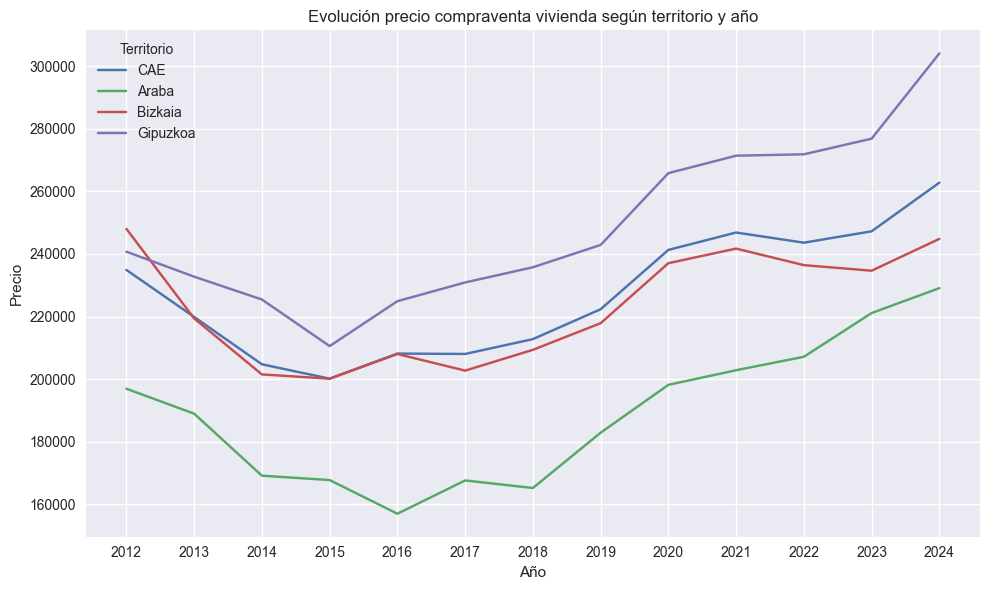

In [7]:
df_precio = pd.read_csv('../data/precio_cv_final.csv')

df_prec_long = df_precio.melt(id_vars='Territorio', var_name='Año', value_name='Precio')

df_prec_long['Año'] = df_prec_long['Año'].astype(int)

mis_colores = ["#0f8ae2", "#dfd110", "#299929", "#d6278d"]
sns.set_palette(mis_colores)

plt.style.use("seaborn-v0_8")  # Un estilo tipo seaborn más suave

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=df_prec_long, x='Año', y='Precio', hue='Territorio', ax=ax1)
ax1.set_ylabel('Precio')
ax1.set_xlabel('Año')
ax1.set_title('Evolución precio compraventa vivienda según territorio y año')

# Formato del eje X: solo años enteros
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.tight_layout()

# Código para ir repitiendo en cada gráfico, selecciona ruta salida
ruta = "../img/intro/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "precio_compraventa_territorio.png"
plt.savefig(os.path.join(ruta, nombre_archivo))

plt.show()


### I.2 Precio Alquiler - Teritorio - Año

Este script transforma el dataset de precios medios por metro cuadrado de alquiler de vivienda libre en Euskadi a formato largo para facilitar su análisis temporal, para ello utiliza el csv de precios de alquiler. 
Genera un gráfico de líneas que muestra la evolución del precio del alquiler por territorio histórico y año. Se formatea el eje X para mostrar únicamente años enteros (utilizamos ticker y lo importamos para esta función), y por último el gráfico se guarda en la carpeta correspondiente de intro que es como hemos llamado a esta parte del EDA.


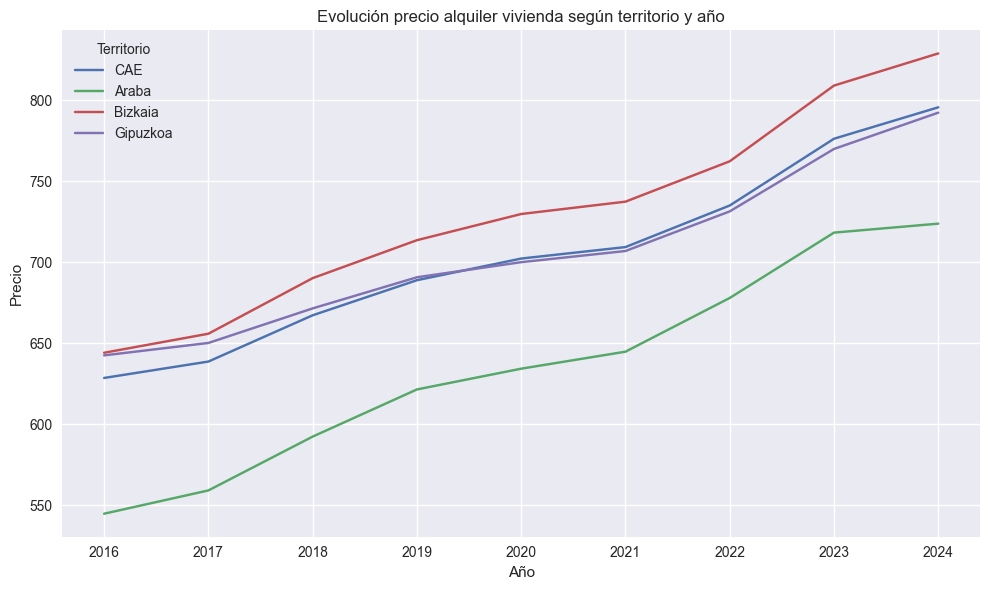

In [3]:
import matplotlib.ticker as ticker

df_prec_alq = pd.read_csv('../data/precio_alquiler_final.csv')

df_precalq_long = df_prec_alq.melt(id_vars='Territorio', var_name='Año', value_name='Precio')

df_precalq_long['Año'] = df_precalq_long['Año'].astype(int)

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=df_precalq_long, x='Año', y='Precio', hue='Territorio', ax=ax1)
ax1.set_ylabel('Precio')
ax1.set_xlabel('Año')

#Sirve para que en eje X se vea como años enteros sin decimales
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))


plt.title('Evolución precio alquiler vivienda según territorio y año')
plt.tight_layout()

ruta = '../img/intro/'
os.makedirs(ruta, exist_ok=True)
nombre_archivo = 'precio_alquiler_territorio_año.jpg'
plt.savefig(os.path.join(ruta, nombre_archivo))


plt.show()


## hipotesis 1: más vivienda en territorios con más suelo liberado

Comenzamos con la primera hipótesis a comprobar. 
Con los csv de licencias totales y el csv del suelo urbanizable que habíamos limpiado en la sección anteriorEste script cruza los datos de suelo urbanizable con el número total de licencias de obra nueva por territorio histórico y año en Euskadi. Tras transformar ambos datasets a formato largo, se realiza un merge por territorio y año. El gráfico resultante es un diagrama de dispersión que permite visualizar la relación entre la disponibilidad de suelo urbanizable (%) y las licencias concedidas, diferenciando por territorio. La imagen se muestra en la memoria y en el script se guarda con el método que hemos explicado previamente sin mostrarse por terminal.


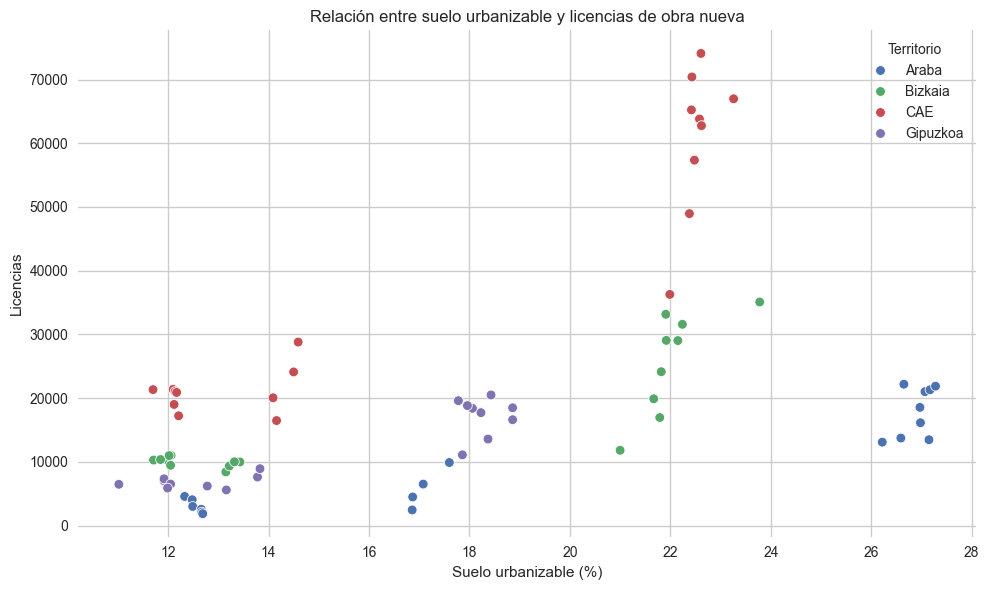

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_licencias = pd.read_csv('../data/licencias_totales.csv')
df_suelo = pd.read_csv('../data/suelo_urbanizable_final.csv')

df_lic_long = df_licencias.melt(id_vars='Territorio', var_name='Año', value_name='Licencias')
df_suelo_long = df_suelo.melt(id_vars='Territorio', var_name='Año', value_name='Suelo_urbanizable')

df_lic_long['Año'] = df_lic_long['Año'].astype(int)
df_suelo_long['Año'] = df_suelo_long['Año'].astype(int)

df_merged = pd.merge(df_lic_long, df_suelo_long, on=['Territorio', 'Año'])

# Grafico Scatter
plt.figure(figsize=(10, 6))
sns.set_style("white")
sns.scatterplot(data=df_merged, x='Suelo_urbanizable', y='Licencias', hue='Territorio')
plt.title('Relación entre suelo urbanizable y licencias de obra nueva')
plt.xlabel('Suelo urbanizable (%)')
plt.ylabel('Licencias')
plt.grid(True)
plt.tight_layout()

# Código para ir repitiendo en cada gráfico, selecciona ruta salida
ruta = "../img/hipotesis_1/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "relacion_suelo_licencias.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))

plt.show()

Evolución de licencias respecto al tiempo

Este script genera un gráfico con dos ejes Y para visualizar conjuntamente la evolución del número de licencias de obra nueva (línea continua) y el porcentaje de suelo urbanizable (línea discontinua) por año y territorio histórico en Euskadi. Se utiliza 'twinx' para superponer ambas variables en un mismo eje temporal, facilitando la comparación de su evolución. El gráfico resultante se guarda como hasta ahora en la carpeta, en este caso hipotesis 1 y se llamará 'licencias_suelo_territorio.jpg'


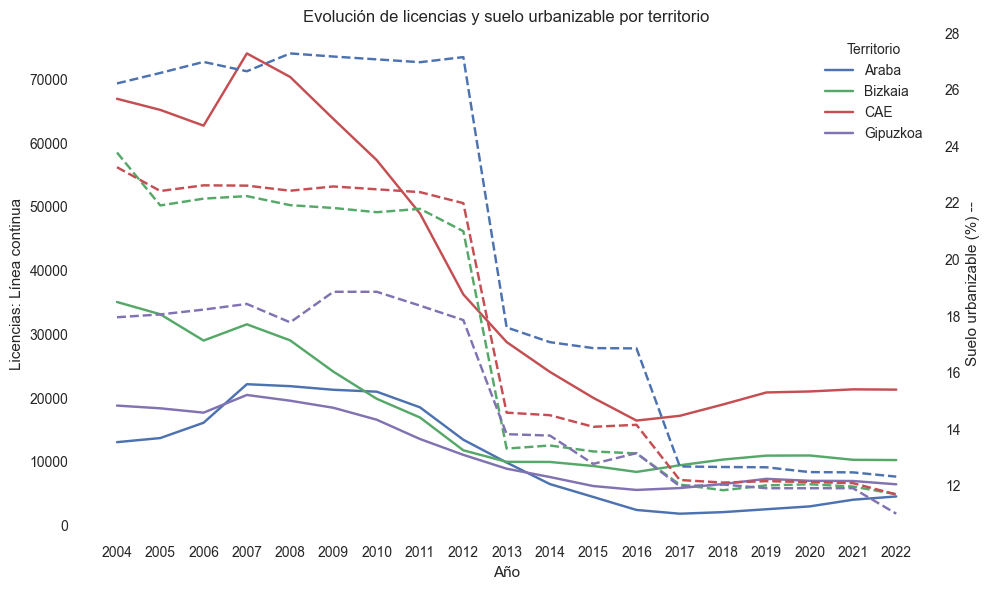

In [5]:
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.lineplot(data=df_merged, x='Año', y='Licencias', hue='Territorio', ax=ax1)
ax1.set_ylabel('Licencias: Línea continua')
ax1.set_xlabel('Año')

#Sirve para que en eje X se vea como años enteros sin decimales
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax2 = ax1.twinx()
sns.lineplot(data=df_merged, x='Año', y='Suelo_urbanizable', hue='Territorio', ax=ax2, linestyle='--', legend=False)
ax2.set_ylabel('Suelo urbanizable (%) --')

plt.title('Evolución de licencias y suelo urbanizable por territorio')
plt.tight_layout()

ruta = "../img/hipotesis_1/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "licencias_suelo_territorio.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))

plt.show()


# Hipotesis 2 - A mayor número de viviendas construidas bajará el precio de la vivienda

Este script cruza los datos de precios medios de compraventa de vivienda con el número de licencias de obra nueva en Euskadi cogiendo los csv de precio de compraventa y el csv de licencias, y relaciolandolas por territorio y año. Tras transformar ambos datasets a formato largo y unificarlos, se genera un gráfico de dispersión con línea de regresión 'lmplot' para observar la relación entre volumen de construcción y precio medio por metro cuadrado. Se diferencia por territorio histórico y se guarda el resultado en su carpeta hipotesis 2.


#### Gráfico dispersión entre licencias y construcción  


<Figure size 1000x600 with 0 Axes>

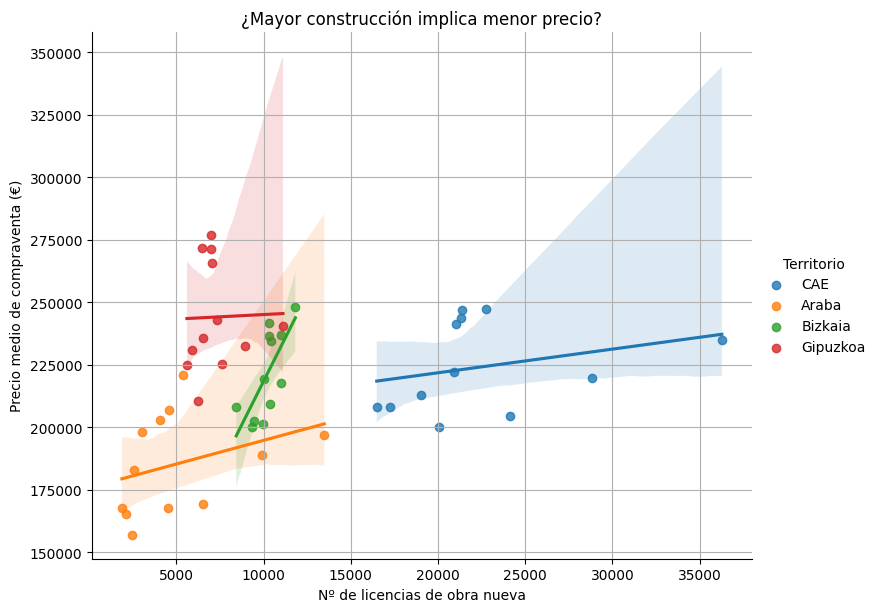

In [3]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

df_precio = pd.read_csv('../data/precio_cv_final.csv')
df_licencias = pd.read_csv('../data/licencias_final.csv')

df_precio_melt = df_precio.melt(id_vars='Territorio', var_name='Año', value_name='Precio')
df_licencias_melt = df_licencias.melt(id_vars='Territorio', var_name='Año', value_name='Licencias')

df = pd.merge(df_precio_melt, df_licencias_melt, on=['Territorio', 'Año'])

df['Año'] = df['Año'].astype(int)


plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='Licencias', y='Precio', hue='Territorio', height=6, aspect=1.3)
plt.title('¿Mayor construcción implica menor precio?')
plt.xlabel('Nº de licencias de obra nueva')
plt.ylabel('Precio medio de compraventa (€)')
plt.grid(True)

# Código para ir repitiendo en cada gráfico, selecciona ruta salida
ruta = "../img/Hipotesis_2/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "construccion_y_precio.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))

plt.show()


#### Correlación anual entre licencias y precio de venta  
El script analiza la evolución anual de la relación entre licencias de obra nueva y el precio medio de compraventa de vivienda en Euskadi. Para ello, transforma ambos datasets a formato largo, los fusiona por territorio y año, y calcula la correlación por año entre ambas variables. El resultado se visualiza mediante un heatmap que muestra la intensidad y dirección de dicha correlación en cada año. El gráfico se guarda como `relacion_licencias_precio_cv.jpg`.


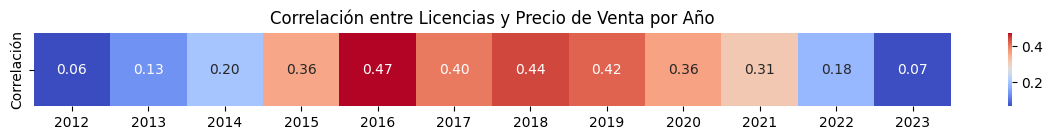

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_lic = pd.read_csv('../data/licencias_final.csv')
df_lic_long = df_lic.melt(id_vars='Territorio', var_name='Año', value_name='Licencias')
df_lic_long['Año'] = df_lic_long['Año'].astype(int)

df_precio = pd.read_csv('../data/precio_cv_final.csv')
df_precio_long = df_precio.melt(id_vars='Territorio', var_name='Año', value_name='Precio_venta')
df_precio_long['Año'] = df_precio_long['Año'].astype(int)

df_merged = pd.merge(df_lic_long, df_precio_long, on=['Territorio', 'Año'])

correlations = df_merged.groupby('Territorio')[['Licencias', 'Precio_venta']].corr().iloc[0::2, 1]
pivot_corr = df_merged.pivot_table(index='Territorio', columns='Año', values='Precio_venta')
pivot_lic = df_merged.pivot_table(index='Territorio', columns='Año', values='Licencias')

correlacion = pivot_corr.corrwith(pivot_lic, axis=0)

plt.figure(figsize=(12, 1.5))
sns.heatmap([correlacion], cmap='coolwarm', annot=True, fmt=".2f", xticklabels=correlacion.index, yticklabels=['Correlación'])
plt.title('Correlación entre Licencias y Precio de Venta por Año')
plt.tight_layout()
ruta = "../img/hipotesis_2/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "relacion_licencias_precio_cv.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))
plt.show()


## Evolución temporal de la correlación entre licencias y precio de compraventa  
Este script calcula la correlación anual, a nivel global de Euskadi, entre el número de licencias de obra nueva y el precio medio de compraventa de vivienda. Tras transformar y unir los datos por territorio y año, se calcula la correlación para cada año y se representa como una línea temporal. El gráfico resultante correlacion_licencias_precio_cv.jpg permite observar cómo ha variado la relación entre ambas variables a lo largo del tiempo, indicando posibles cambios estructurales en el mercado de la vivienda.


C:\Users\Eduardo\AppData\Local\Temp\ipykernel_3224\2568651460.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlaciones = df.groupby('Año').apply(lambda g: g['Licencias'].corr(g['Precio_venta'])).reset_index()


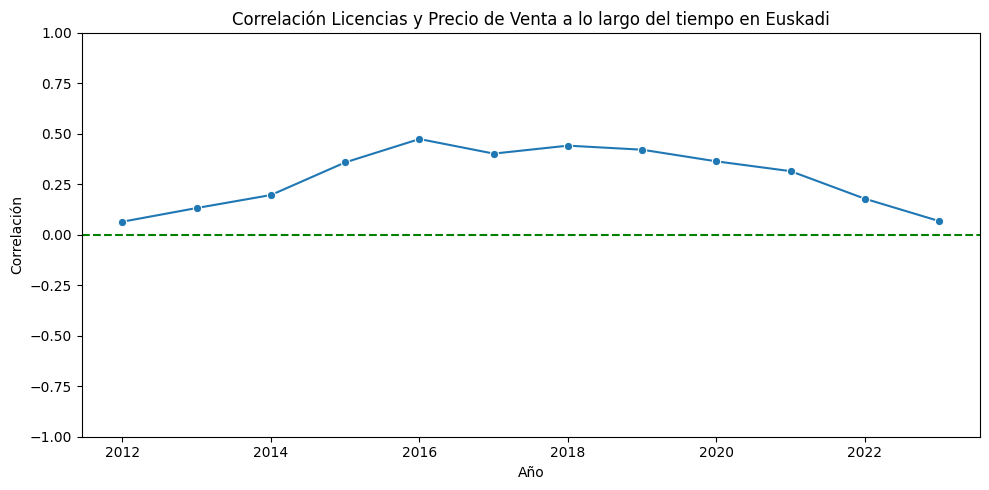

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_lic = pd.read_csv('../data/licencias_final.csv')
df_precio = pd.read_csv('../data/precio_cv_final.csv')

df_lic_long = df_lic.melt(id_vars='Territorio', var_name='Año', value_name='Licencias')
df_precio_long = df_precio.melt(id_vars='Territorio', var_name='Año', value_name='Precio_venta')

df_lic_long['Año'] = df_lic_long['Año'].astype(int)
df_precio_long['Año'] = df_precio_long['Año'].astype(int)

df = pd.merge(df_lic_long, df_precio_long, on=['Territorio', 'Año'])

correlaciones = df.groupby('Año').apply(lambda g: g['Licencias'].corr(g['Precio_venta'])).reset_index()
correlaciones.columns = ['Año', 'Correlación']

plt.figure(figsize=(10, 5))
sns.lineplot(data=correlaciones, x='Año', y='Correlación', marker='o')
plt.title('Correlación Licencias y Precio de Venta a lo largo del tiempo en Euskadi')
plt.ylim(-1, 1)
plt.axhline(0, color='green', linestyle='--')
plt.tight_layout()
ruta = "../img/hipotesis_2/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "correlacion_licencias_precio_cv.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))
plt.show()


## Correlación entre licencias de obra nueva y precios de compraventa por territorio  
Este análisis calcula la correlación total, acumulada por territorio histórico (Araba, Bizkaia y Gipuzkoa), entre el número de licencias de obra nueva y el precio medio de compraventa de vivienda. Los datos se reorganizan en formato largo y se fusionan por territorio y año. La correlación se calcula para cada territorio de forma agregada en el tiempo, arrojando un único valor por cada uno. El resultado se imprime en consola y permite identificar si, en general, una mayor actividad constructiva se asocia con variaciones en el precio de la vivienda dentro de cada territorio.


In [6]:
import pandas as pd

df_licencias = pd.read_csv('../data/licencias_totales.csv')
df_precio = pd.read_csv('../data/precio_cv_final.csv')

df_lic_long = df_licencias.melt(id_vars='Territorio', var_name='Año', value_name='Licencias')
df_precio_long = df_precio.melt(id_vars='Territorio', var_name='Año', value_name='Precio_venta')

df_lic_long['Año'] = df_lic_long['Año'].astype(int)
df_precio_long['Año'] = df_precio_long['Año'].astype(int)

df = pd.merge(df_lic_long, df_precio_long, on=['Territorio', 'Año'])

correlaciones = (
    df.groupby('Territorio')[['Licencias', 'Precio_venta']]
    .corr()
    .iloc[0::2, -1]
    .reset_index()
    .rename(columns={'Precio_venta': 'Correlación'})[['Territorio', 'Correlación']]
)

print(correlaciones)


  Territorio  Correlación
0      Araba     0.327881
1    Bizkaia     0.704674
2        CAE     0.288847
3   Gipuzkoa     0.024784


C:\Users\Eduardo\AppData\Local\Temp\ipykernel_3224\836678934.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlaciones, x='Territorio', y='Correlación', palette='coolwarm', edgecolor='black')


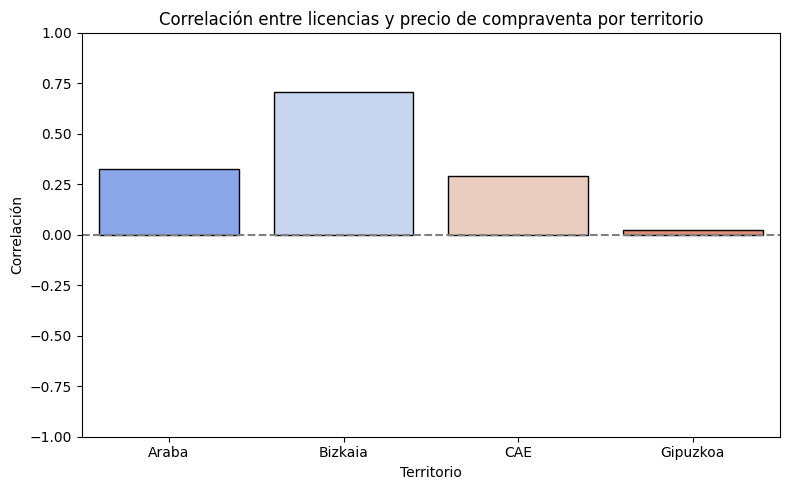

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=correlaciones, x='Territorio', y='Correlación', palette='coolwarm', edgecolor='black')

plt.title('Correlación entre licencias y precio de compraventa por territorio')
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()

ruta = "../img/hipotesis_2/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "corelacion_licencias_precio_cv_territorio.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))


plt.show()


## Hipotesis 3 demanda no satisfecha de vivienda pública protegida y el aumento del precio del precio del alquiler

## Correlación entre solicitantes de vivienda pública, viviendas entregadas y precios (compra y alquiler)

Este análisis combina cuatro variables clave por territorio y año:

- Número de solicitantes de vivienda pública.
- Viviendas protegidas entregadas.
- Precio medio de compraventa de vivienda libre.
- Precio medio de alquiler.

Se integran en un único DataFrame, se eliminan los registros incompletos para asegurar coherencia en el análisis.  Se calcula la matriz de correlación entre las variables, lo que permite evaluar si existe relación entre la demanda de vivienda pública y la evolución de precios en el mercado libre, así como con la oferta de vivienda protegida.

El resultado es una matriz que muestra cómo varían juntas estas variables, útil para fundamentar hipótesis sobre presión de demanda, accesibilidad a la vivienda y la eficacia del sistema público de adjudicación.


In [ ]:
import pandas as pd

sol_df = pd.read_csv("../data/solicitantes_totales.csv")
entreg_df = pd.read_csv("../data/viviendas_etxebide_total.csv")
compra_df = pd.read_csv("../data/precio_cv_final.csv")
alquiler_df = pd.read_csv("../data/precio_alquiler_final.csv")

sol_long = sol_df.melt(id_vars="Territorio", var_name="Año", value_name="Solicitantes")
entreg_long = entreg_df.melt(id_vars="Territorio", var_name="Año", value_name="Viviendas_Entregadas")
compra_long = compra_df.melt(id_vars="Territorio", var_name="Año", value_name="Precio_Compraventa")
alquiler_long = alquiler_df.melt(id_vars="Territorio", var_name="Año", value_name="Precio_Alquiler")

sol_long["Año"] = sol_long["Año"].astype(str)
entreg_long["Año"] = entreg_long["Año"].astype(str)
compra_long["Año"] = compra_long["Año"].astype(str)
alquiler_long["Año"] = alquiler_long["Año"].astype(str)


df_merge_1 = pd.merge(sol_long, entreg_long, on=["Territorio", "Año"], how="outer")
df_merge_2 = pd.merge(df_merge_1, compra_long, on=["Territorio", "Año"], how="outer")
df_final = pd.merge(df_merge_2, alquiler_long, on=["Territorio", "Año"], how="outer")

cols_num = ["Solicitantes", "Viviendas_Entregadas", "Precio_Compraventa", "Precio_Alquiler"]
for col in cols_num:
    df_final[col] = pd.to_numeric(df_final[col], errors="coerce")

df_final = df_final.dropna(how="all", subset=cols_num)


# Filtrar filas con datos completos para las variables
df_corr = df_final.dropna(subset=["Solicitantes", "Viviendas_Entregadas", "Precio_Compraventa", "Precio_Alquiler"])

# Calcular correlación
corr_matrix = df_corr[["Solicitantes", "Viviendas_Entregadas", "Precio_Compraventa", "Precio_Alquiler"]].corr()

print(corr_matrix)


                      Solicitantes  Viviendas_Entregadas  Precio_Compraventa  \
Solicitantes              1.000000              0.881700            0.236208   
Viviendas_Entregadas      0.881700              1.000000            0.098363   
Precio_Compraventa        0.236208              0.098363            1.000000   
Precio_Alquiler           0.346028              0.226109            0.728295   

                      Precio_Alquiler  
Solicitantes                 0.346028  
Viviendas_Entregadas         0.226109  
Precio_Compraventa           0.728295  
Precio_Alquiler              1.000000  


### Correlación entre solicitantes, viviendas protegidas entregadas y precios

El mapa de calor muestra la relación entre:

- Demanda de vivienda pública (Solicitantes)
- Oferta de vivienda pública (Viviendas entregadas)
- Precio medio de compraventa de vivienda libre
- Precio medio de alquiler

El uso de un heatmap con escala [-1, 1] permite detectar con claridad:

- Correlaciones positivas (en rojo): las variables tienden a aumentar juntas.
- Correlaciones negativas (en azul): cuando una sube, la otra tiende a bajar.
- Correlaciones cercanas a 0 (en blanco): no hay una relación lineal clara.

Esta visualización facilita comprobar si una mayor entrega de vivienda protegida reduce la presión sobre los precios del mercado libre o si hay una conexión directa entre precios y demanda pública.



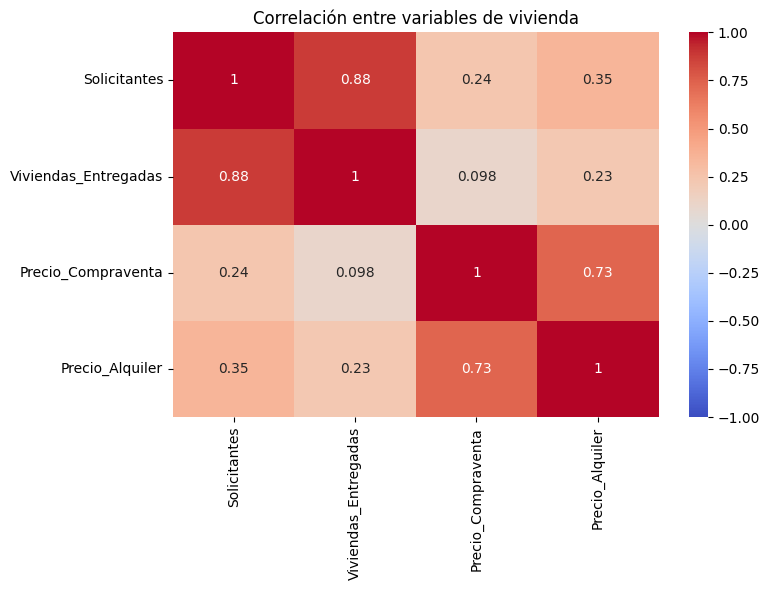

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlación entre variables de vivienda")
plt.tight_layout()

ruta = "../img/hipotesis_3/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "corelacion_vpo_precios.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))
plt.show()


## Hipotesis 4 Pisos turísticos

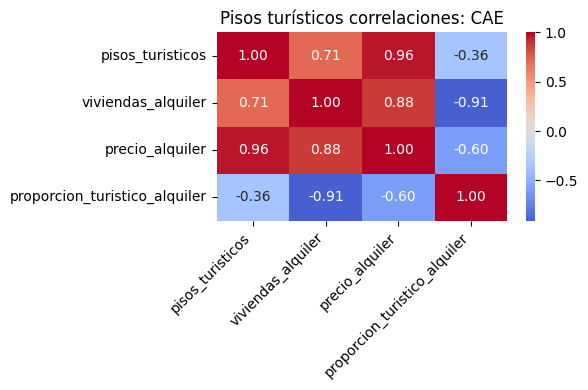

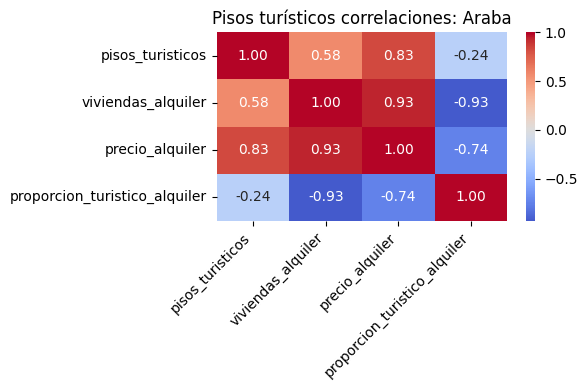

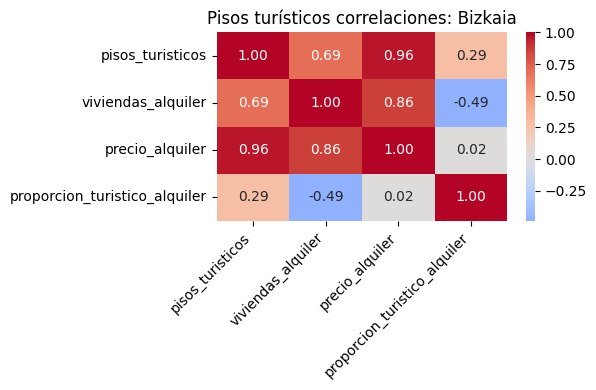

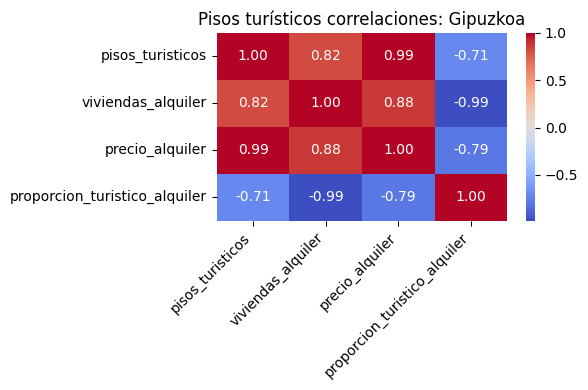

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def cargar_csv_wide(path, nombre_variable):
    df = pd.read_csv(path, sep=",")
    df.columns = df.columns.str.strip()
    df = df.melt(id_vars="Territorio", var_name="Año", value_name=nombre_variable)
    df["Año"] = df["Año"].astype(int)
    df[nombre_variable] = df[nombre_variable].astype(float)
    return df

df_alquiler = cargar_csv_wide("../data/viviendas_alquiler.csv", "viviendas_alquiler")
df_turisticos = cargar_csv_wide("../data/viviendas_turisticas.csv", "pisos_turisticos")
df_precios = cargar_csv_wide("../data/precio_alquiler_final.csv", "precio_alquiler")

df = df_alquiler.merge(df_turisticos, on=["Territorio", "Año"], how="inner") \
                .merge(df_precios, on=["Territorio", "Año"], how="inner")

df["proporcion_turistico_alquiler"] = df["pisos_turisticos"] / df["viviendas_alquiler"]

territorios = df["Territorio"].unique()

for territorio in territorios:
    df_territorio = df[df["Territorio"] == territorio]
    cor = df_territorio[["pisos_turisticos", "viviendas_alquiler", "precio_alquiler", "proporcion_turistico_alquiler"]].corr()

    plt.figure(figsize=(6, 4))
    sns.heatmap(cor, annot=True, cmap="coolwarm", center=0, fmt=".2f")
    plt.title(f"Pisos turísticos correlaciones: {territorio}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    ruta = "../img/hipotesis_4/"
    os.makedirs(ruta, exist_ok=True)
    nombre_archivo = "pisos_turisticos_correlaciones.jpg"
    plt.savefig(os.path.join(ruta, nombre_archivo))


## Hipotesis 5 Ha aumentado el precio medio del metro cuadrado en la misma proporción que el precio de venta/alquiler del inmueble? 

### Comparación entre la evolución del precio por metro cuadrado y el precio total de compraventa

Se analiza si los cambios en el precio medio por metro cuadrado de vivienda libre se corresponden proporcionalmente con los cambios en el precio total de compraventa, utilizando los csv de precio de m2 o precio de compraventa final que limpiamos en la sección anterior, lo que permitiría inferir estabilidad en la superficie media de las viviendas vendidas. Para ello, se calculan ambas tasas de variación por territorio histórico y se estima la superficie media de las viviendas vendidas como cociente entre precio total y precio por metro cuadrado. Luego se calcula la diferencia entre las tasas de variación para evaluar si el encarecimiento del metro cuadrado es el principal impulsor del precio total o si hay otros factores, como un cambio en la superficie media. Los resultados se resumen por territorio y se exportan para su posterior análisis.


In [ ]:
import pandas as pd

# Leer archivos CSV desde disco
df_m2 = pd.read_csv("../data/precio_m2_final.csv")
df_total = pd.read_csv("../data/precio_cv_final.csv")

df_m2_long = df_m2.melt(id_vars='Territorio', var_name='Año', value_name='Precio_m2')
df_total_long = df_total.melt(id_vars='Territorio', var_name='Año', value_name='Precio_total')

df_combined = pd.merge(df_m2_long, df_total_long, on=['Territorio', 'Año'])

# Calcular superficie estimada
df_combined['Superficie_estim_m2'] = df_combined['Precio_total'] / df_combined['Precio_m2']

df_combined = df_combined.sort_values(by=['Territorio', 'Año'])

# Asegurar que Año es numérico
df_combined['Año'] = df_combined['Año'].astype(int)

# Ordenar
df_combined = df_combined.sort_values(['Territorio', 'Año'])

# Calcular tasas de variación (%)
df_combined['Var_pct_m2'] = df_combined.groupby('Territorio')['Precio_m2'].pct_change() * 100
df_combined['Var_pct_total'] = df_combined.groupby('Territorio')['Precio_total'].pct_change() * 100

# Diferencia entre las tasas
df_combined['Diferencia_pct'] = df_combined['Var_pct_m2'] - df_combined['Var_pct_total']

# Mostrar resumen por territorio
resumen = df_combined.groupby('Territorio')[['Var_pct_m2', 'Var_pct_total', 'Diferencia_pct']].mean().round(2)
print(resumen)

df_combined.to_csv("../data/variaciones_precio_vs_total.csv", index=False)

print(df_combined.head())



            Var_pct_m2  Var_pct_total  Diferencia_pct
Territorio                                           
Araba             0.91           1.45           -0.55
Bizkaia           0.21           0.04            0.17
CAE               0.93           1.04           -0.11
Gipuzkoa          1.82           2.08           -0.26
   Territorio   Año  Precio_m2  Precio_total  Superficie_estim_m2  Var_pct_m2  \
1       Araba  2012    2100.65     196940.00            93.751934         NaN   
5       Araba  2013    2016.62     188964.50            93.703573   -4.000190   
9       Araba  2014    1855.75     169159.75            91.154385   -7.977209   
13      Araba  2015    1667.81     167763.00           100.588796  -10.127442   
17      Araba  2016    1653.39     157015.25            94.965646   -0.864607   

    Var_pct_total  Diferencia_pct  
1             NaN             NaN  
5       -4.049711        0.049520  
9      -10.480672        2.503463  
13      -0.825699       -9.301743  
17      -

Una vez con el df de las variaciones calculadas podemos pasar a graficar la variación anual del precio medio por metro cuadrado y del precio total de compraventa de vivienda libre en los tres territorios históricos. El análisis muestra que, aunque ambas curvas tienden a moverse en la misma dirección, las diferencias en la magnitud de las variaciones indican que la superficie media de las viviendas vendidas no se mantiene constante a lo largo del tiempo. Esta diferencia, calculada explícitamente, sugiere que el encarecimiento o abaratamiento total de los inmuebles no se debe exclusivamente al cambio en el precio por metro cuadrado, sino que también intervienen factores como el tamaño medio de las viviendas transaccionadas en cada periodo.


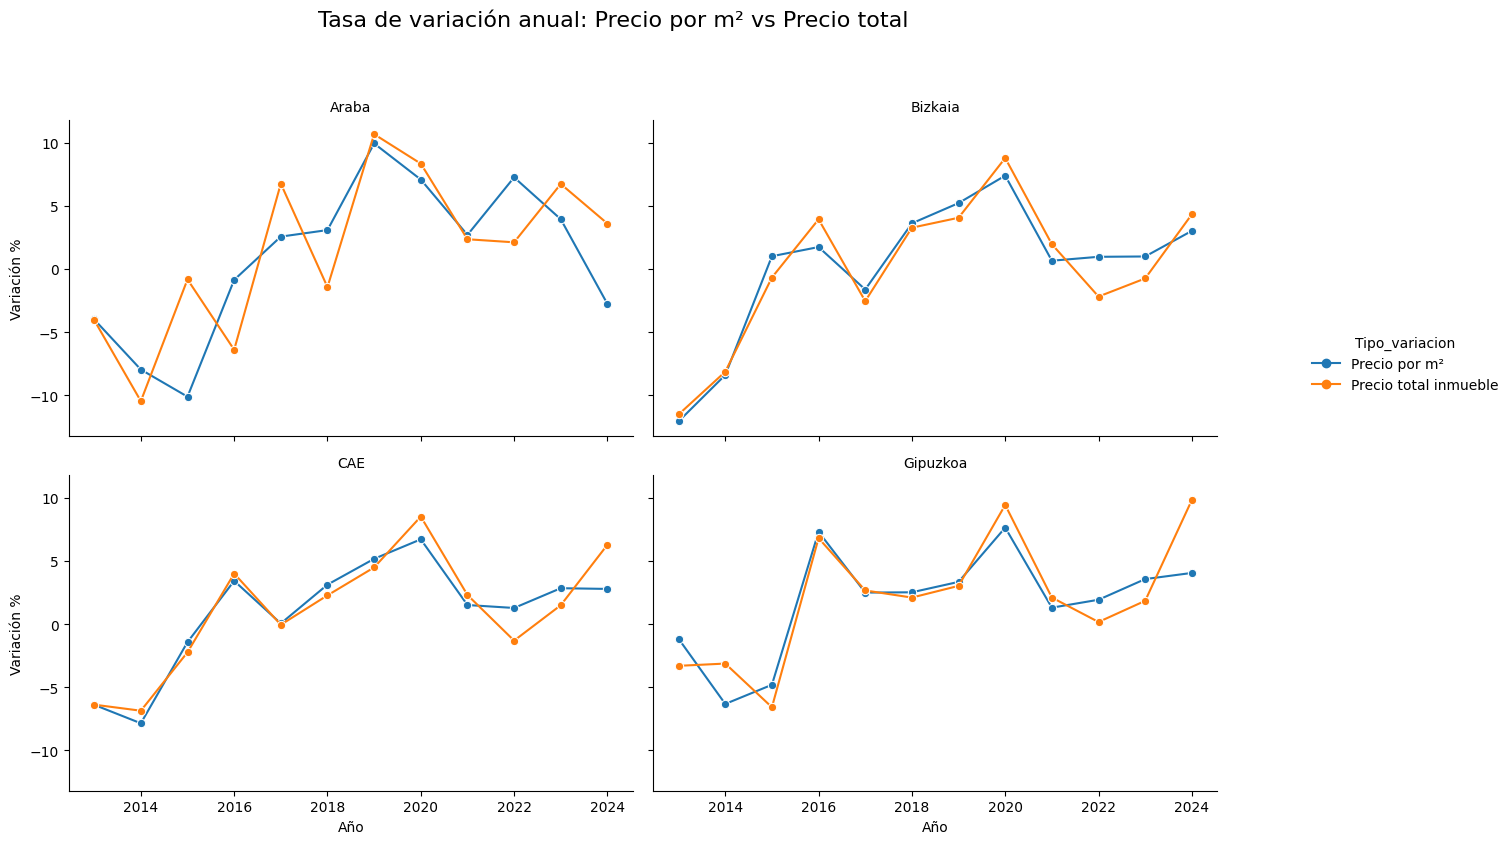

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

df_m2 = pd.read_csv("../data/precio_m2_final.csv")
df_total = pd.read_csv("../data/precio_cv_final.csv")

df_m2_long = df_m2.melt(id_vars='Territorio', var_name='Año', value_name='Precio_m2')
df_total_long = df_total.melt(id_vars='Territorio', var_name='Año', value_name='Precio_total')

df_combined = pd.merge(df_m2_long, df_total_long, on=['Territorio', 'Año'])

df_combined['Superficie_estim_m2'] = df_combined['Precio_total'] / df_combined['Precio_m2']

df_combined = df_combined.sort_values(by=['Territorio', 'Año'])

df_combined['Año'] = df_combined['Año'].astype(int)

df_combined = df_combined.sort_values(['Territorio', 'Año'])

df_combined['Var_pct_m2'] = df_combined.groupby('Territorio')['Precio_m2'].pct_change() * 100
df_combined['Var_pct_total'] = df_combined.groupby('Territorio')['Precio_total'].pct_change() * 100

df_combined['Diferencia_pct'] = df_combined['Var_pct_m2'] - df_combined['Var_pct_total']

resumen = df_combined.groupby('Territorio')[['Var_pct_m2', 'Var_pct_total', 'Diferencia_pct']].mean().round(2)

df_combined.to_csv("../data/variaciones_precio_vs_total.csv", index=False)

# Melt para juntar ambas tasas en una sola columna para los graficos
df_plot = pd.melt(
    df_combined,
    id_vars=['Territorio', 'Año'],
    value_vars=['Var_pct_m2', 'Var_pct_total'],
    var_name='Tipo_variacion',
    value_name='Variacio%'
)

df_plot['Tipo_variacion'] = df_plot['Tipo_variacion'].map({
    'Var_pct_m2': 'Precio por m²',
    'Var_pct_total': 'Precio total inmueble'
})

g = sns.relplot(
    data=df_plot,
    x='Año',
    y='Variacio%',
    hue='Tipo_variacion',
    kind='line',
    col='Territorio',
    col_wrap=2,
    facet_kws={'sharey': True},  
    height=4,
    aspect=1.3,
    marker='o'
)

g.set_titles("{col_name}")
g.figure.suptitle("Tasa de variación anual: Precio por m² vs Precio total", fontsize=16, y=1.05)
g.set_axis_labels("Año", "Variación %")

g._legend.set_bbox_to_anchor((1.05, 0.6))
g._legend.set_loc('center left')

for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()

ruta = "../img/hipotesis_5/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "variacion_precio_m2_cv.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo), bbox_inches='tight')  
plt.show()


## Hipótesis 6: ¿A mayor inmigración, mayor número de solicitantes de vivienda protegida?

Se analiza la posible relación entre el número total de personas extranjeras residentes y la cantidad de solicitantes de vivienda protegida en cada territorio. El gráfico de regresión muestra una correlación positiva moderada, especialmente en Bizkaia y Gipuzkoa, lo que sugiere que un aumento en la población inmigrante podría estar relacionado con una mayor demanda de vivienda protegida. Aunque la relación no es estrictamente lineal ni uniforme en todos los territorios, los resultados respaldan la hipótesis de que el crecimiento migratorio es un factor a tener en cuenta en la planificación de políticas de acceso a la vivienda.


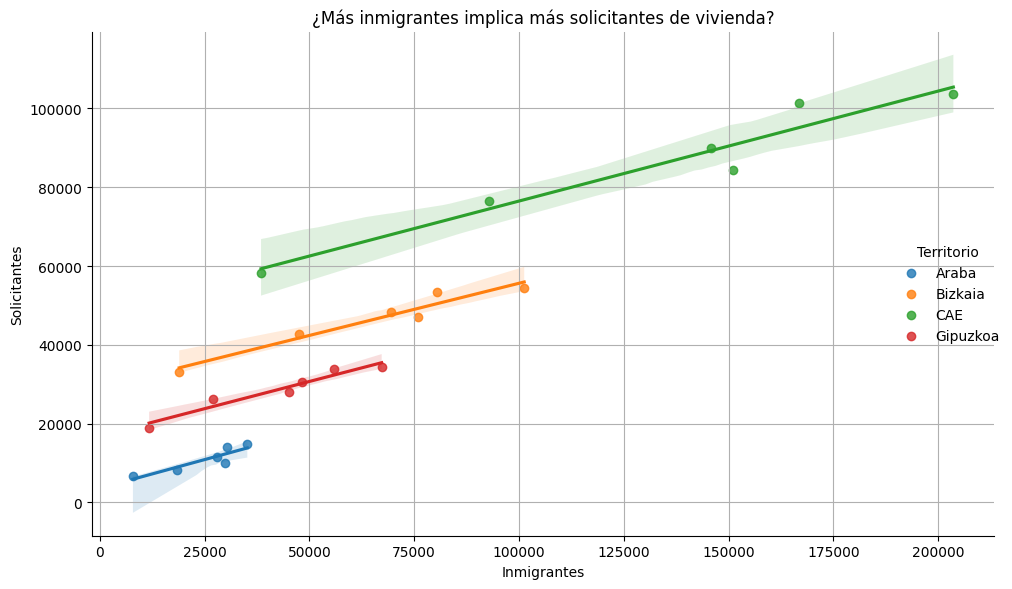

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sol_df = pd.read_csv("../data/solicitantes_totales.csv")
inm_df = pd.read_csv("../data/poblacion_extranjera_total.csv")

sol_long = sol_df.melt(id_vars="Territorio", var_name="Año", value_name="Solicitantes")
inm_long = inm_df.melt(id_vars="Territorio", var_name="Año", value_name="Inmigrantes")

sol_long["Año"] = sol_long["Año"].astype(str)
inm_long["Año"] = inm_long["Año"].astype(str)

merged = pd.merge(sol_long, inm_long, on=["Territorio", "Año"], how="inner")

merged = merged.dropna()

merged["Solicitantes"] = pd.to_numeric(merged["Solicitantes"], errors='coerce')
merged["Inmigrantes"] = pd.to_numeric(merged["Inmigrantes"], errors='coerce')

sns.lmplot(data=merged, x="Inmigrantes", y="Solicitantes", hue="Territorio", height=6, aspect=1.5)
plt.title("¿Más inmigrantes implica más solicitantes de vivienda?")
plt.grid(True)
plt.tight_layout()
ruta = "../img/hipotesis_6/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "relacion_inmigracion_solicitantes.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))
plt.show()


#### Relación entre inmigración y población total

Este análisis complementario explora si el número de personas extranjeras guarda relación con la población total en cada territorio. El gráfico muestra una fuerte correlación lineal positiva: a mayor población total, mayor número de residentes extranjeros. Esto confirma que el volumen de inmigración está estrechamente ligado al tamaño poblacional del territorio, lo que refuerza la necesidad de considerar ambos factores en la planificación de políticas de vivienda, especialmente en contextos urbanos con alta presión demográfica.


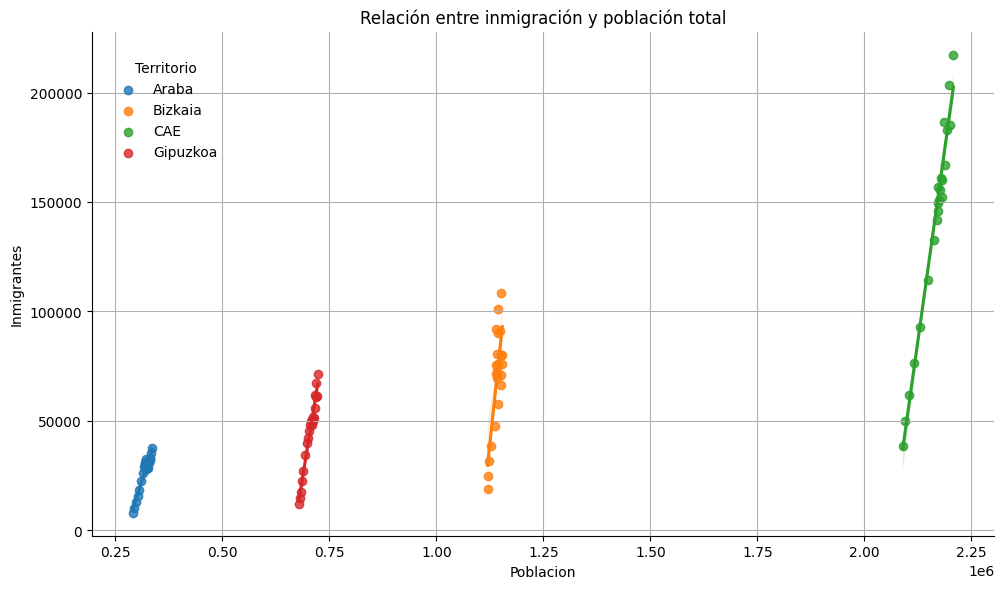

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

inm_df = pd.read_csv("../data/poblacion_extranjera_total.csv")
pob_df = pd.read_csv("../data/poblacion_total_limpio.csv")

inm_long = inm_df.melt(id_vars="Territorio", var_name="Año", value_name="Inmigrantes")
pob_long = pob_df.melt(id_vars="Territorio", var_name="Año", value_name="Poblacion")

merged = pd.merge(inm_long, pob_long, on=["Territorio", "Año"], how="inner")

merged["Inmigrantes"] = pd.to_numeric(merged["Inmigrantes"], errors='coerce')
merged["Poblacion"] = pd.to_numeric(merged["Poblacion"], errors='coerce')

merged = merged.dropna()

g = sns.lmplot(data=merged, x="Poblacion", y="Inmigrantes", hue="Territorio", height=6, aspect=1.5)

plt.title("Relación entre inmigración y población total")
plt.grid(True)
plt.tight_layout()

g._legend.set_bbox_to_anchor((0.1, 0.90)) 
g._legend.set_loc('upper left')

ruta = "../img/hipotesis_6/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "relacion_inmigracion_poblacion.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))

plt.show()


### Peso de la inmigración sobre la población total

Este análisis calcula el porcentaje que representa la población extranjera sobre el total en cada territorio y año, permitiendo observar el peso relativo de la inmigración. El gráfico muestra diferencias claras entre territorios: en algunos, los inmigrantes suponen una proporción creciente de la población total, lo que puede implicar mayor presión sobre los recursos habitacionales. Esta perspectiva complementa los análisis anteriores al centrarse en la intensidad del fenómeno migratorio, más allá de sus valores absolutos.


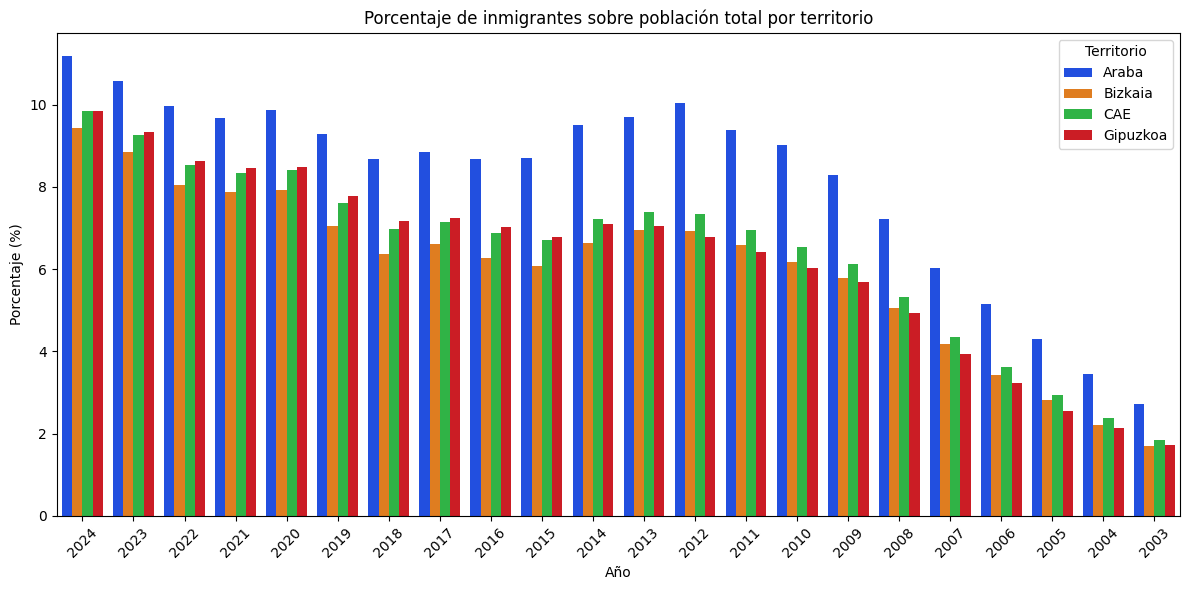

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar y transformar datos
inm_df = pd.read_csv("../data/poblacion_extranjera_total.csv")
pob_df = pd.read_csv("../data/poblacion_total_limpio.csv")

inm_long = inm_df.melt(id_vars="Territorio", var_name="Año", value_name="Inmigrantes")
pob_long = pob_df.melt(id_vars="Territorio", var_name="Año", value_name="Poblacion")

merged = pd.merge(inm_long, pob_long, on=["Territorio", "Año"], how="inner")

# Asegurar datos numéricos
merged["Inmigrantes"] = pd.to_numeric(merged["Inmigrantes"], errors='coerce')
merged["Poblacion"] = pd.to_numeric(merged["Poblacion"], errors='coerce')

# Eliminar nulos
merged = merged.dropna()

# Calcular proporción o porcentaje
merged["Proporcion"] = merged["Inmigrantes"] / merged["Poblacion"]
# Opcional: en porcentaje
merged["Porcentaje"] = merged["Proporcion"] * 100

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=merged, x="Año", y="Porcentaje", hue="Territorio", palette="bright",errorbar=None)
plt.title("Porcentaje de inmigrantes sobre población total por territorio")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45)
plt.tight_layout()

ruta = "../img/hipotesis_6/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "relacion_inmigrantes_poblacion_territorio.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))
plt.show()


### Relación entre inmigración y población total

Este gráfico muestra la relación entre la inmigración y la población total con una escala unificada en ambos ejes, lo que permite comparar visualmente el peso relativo de la inmigración en cada territorio. Al mantener la misma escala, se evita inducir interpretaciones erróneas por diferencias de proporción entre territorios. El resultado confirma una relación lineal esperable: cuanto mayor es la población total, mayor es también el número de inmigrantes, aunque con variaciones en la pendiente que reflejan diferencias en la intensidad relativa del fenómeno migratorio.


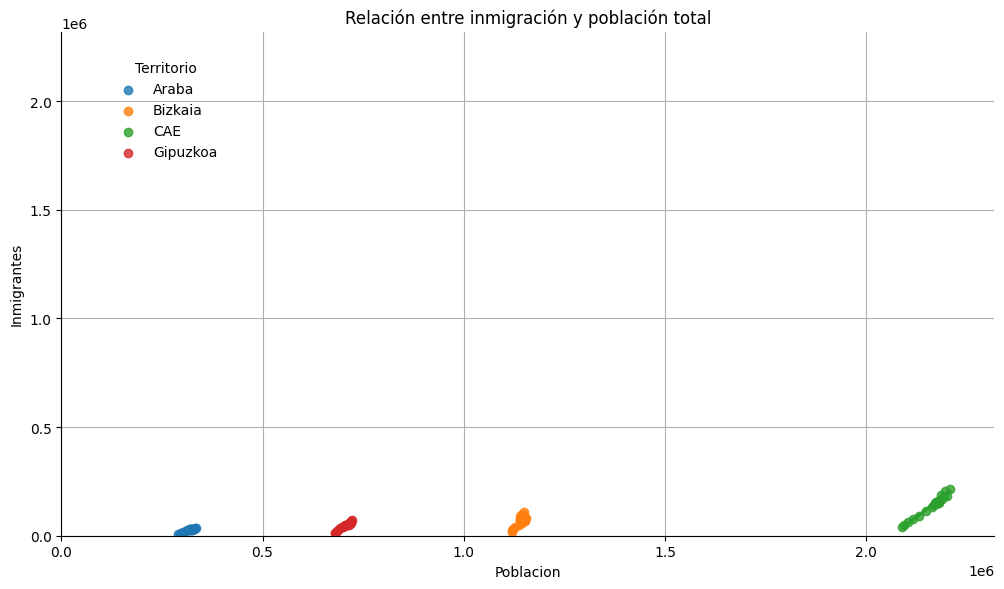

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


inm_df = pd.read_csv("../data/poblacion_extranjera_total.csv")
pob_df = pd.read_csv("../data/poblacion_total_limpio.csv")


inm_long = inm_df.melt(id_vars="Territorio", var_name="Año", value_name="Inmigrantes")
pob_long = pob_df.melt(id_vars="Territorio", var_name="Año", value_name="Poblacion")


merged = pd.merge(inm_long, pob_long, on=["Territorio", "Año"], how="inner")

merged["Inmigrantes"] = pd.to_numeric(merged["Inmigrantes"], errors='coerce')
merged["Poblacion"] = pd.to_numeric(merged["Poblacion"], errors='coerce')


merged = merged.dropna()

max_val = max(merged["Inmigrantes"].max(), merged["Poblacion"].max())

g = sns.lmplot(data=merged, x="Poblacion", y="Inmigrantes", hue="Territorio", height=6, aspect=1.5)

#Establececemos los valores de los ejes para que se muestren en la misma
margin = max_val * 0.05 
g.set(xlim=(0, max_val + margin), ylim=(0, max_val + margin))


plt.title("Relación entre inmigración y población total")
plt.tight_layout()
plt.grid(True)
g._legend.set_bbox_to_anchor((0.1, 0.90))
g._legend.set_loc('upper left')

ruta = "../img/hipotesis_6/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "relacion_inmigracion_poblacion_mismaescala.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))

plt.show()

## Hipotesis 7 Un mayor porcentaje de mujeres electas en los gobiernos municipales se asocia con políticas de vivienda más activas o eficaces.

¿Influye la presencia de mujeres electas en las decisiones urbanísticas?

Este análisis explora si existe una relación entre el número de mujeres electas por territorio y dos variables clave en el ámbito urbanístico: las licencias de obra nueva concedidas y la superficie urbanizable disponible. Se construyó una matriz de correlación para los datos agregados, visualizada mediante un mapa de calor. 

Los resultados muestran correlaciones débiles entre las variables, sin indicios claros de que un mayor número de mujeres electas esté vinculado con más (o menos) licencias o disponibilidad de suelo urbanizable. Esto sugiere que, al menos en términos cuantitativos globales, la variable de género en la representación política no parece tener un efecto directo sobre estas decisiones estructurales.


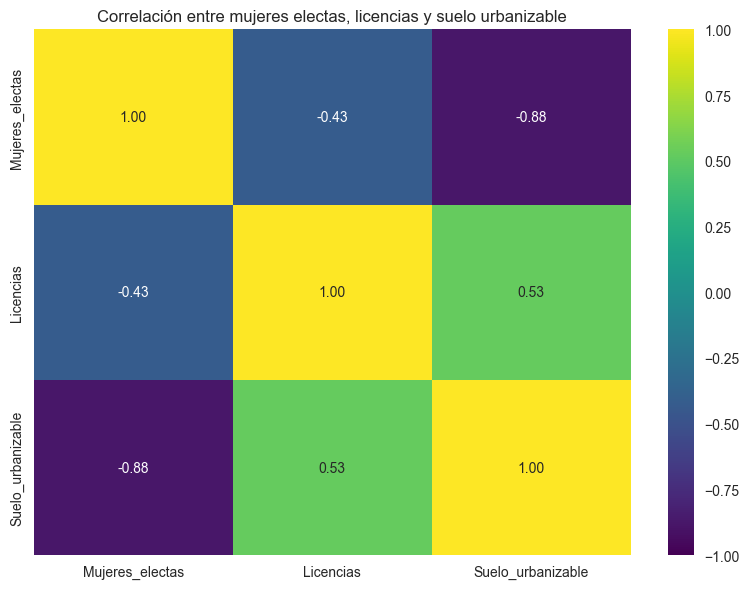

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mujeres = pd.read_csv("../data/mujeres_limpio.csv")
licencias = pd.read_csv("../data/licencias_totales.csv")
suelo = pd.read_csv("../data/suelo_urbanizable_final.csv")

mujeres_long = mujeres.melt(id_vars="Territorio", var_name="Año", value_name="Mujeres_electas")
licencias_long = licencias.melt(id_vars="Territorio", var_name="Año", value_name="Licencias")
suelo_long = suelo.melt(id_vars="Territorio", var_name="Año", value_name="Suelo")

df = mujeres_long.merge(licencias_long, on=["Territorio", "Año"], how="inner")
df = df.merge(suelo_long, on=["Territorio", "Año"], how="left")

df["Año"] = df["Año"].astype(int)

plt.style.use("seaborn-v0_8")  # Un estilo tipo seaborn más suave



mujeres = pd.read_csv("../data/mujeres_limpio.csv")
licencias = pd.read_csv("../data/licencias_totales.csv")
suelo = pd.read_csv("../data/suelo_urbanizable_final.csv")

mujeres_long = mujeres.melt(id_vars="Territorio", var_name="Año", value_name="Mujeres_electas")
licencias_long = licencias.melt(id_vars="Territorio", var_name="Año", value_name="Licencias")
suelo_long = suelo.melt(id_vars="Territorio", var_name="Año", value_name="Suelo_urbanizable")

df = mujeres_long.merge(licencias_long, on=["Territorio", "Año"], how="inner")
df = df.merge(suelo_long, on=["Territorio", "Año"], how="left")

df["Año"] = df["Año"].astype(int)

corr_matrix = df[["Mujeres_electas", "Licencias", "Suelo_urbanizable"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlación entre mujeres electas, licencias y suelo urbanizable")
plt.tight_layout()

ruta = "../img/hipotesis_7/"
os.makedirs(ruta, exist_ok=True)
nombre_archivo = "relacion_mujeres_licencias.jpg"
plt.savefig(os.path.join(ruta, nombre_archivo))
plt.show()